   * The dataset contains 42,000 rows where each row represents an image.
   * The first column (label) indicates the digit (0-9) and the remaining columns represent pixel values of the image.
   * We separate these into X (pixel values) and y (labels).
   * X has 42,000 samples with 784 features (28x28 pixels) and y has 42,000 labels.


### ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### ***Load and Explore the Dataset***

In [2]:
data=pd.read_csv('/content/Train.csv')
data.shape

(42000, 785)

In [3]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [4]:
x.shape,y.shape

((42000, 784), (42000,))

### ***Preprocess the Data***

In [5]:
if not isinstance(x,pd.DataFrame):
  x=pd.DataFrame(x)


In [6]:
x=x.apply(pd.to_numeric,errors='coerce')
x=x.fillna(0)
x=x.values/255.0
x=x.reshape(-1,28,28,1)

In [7]:
x.shape

(42000, 28, 28, 1)

### ***One-Hot Encode the Labels***

In [8]:
y=to_categorical(y,num_classes=10)
y.shape

(42000, 10)

### ***Split the Data***

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

### ***Build the Neural Network Model***

In [19]:
from tensorflow.keras.layers import Flatten

model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### ***Train the Model***

In [22]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8465 - loss: 0.5425 - val_accuracy: 0.9485 - val_loss: 0.1677
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9608 - loss: 0.1339 - val_accuracy: 0.9644 - val_loss: 0.1160
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9735 - loss: 0.0898 - val_accuracy: 0.9650 - val_loss: 0.1062
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9796 - loss: 0.0687 - val_accuracy: 0.9676 - val_loss: 0.1101
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9724 - val_loss: 0.0967
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9721 - val_loss: 0.1009
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9726 - val_loss: 0.1049
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9919 - loss: 0.0254 - 

### ***Evaluate the Model***

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1384
Validation Accuracy: 97.08%


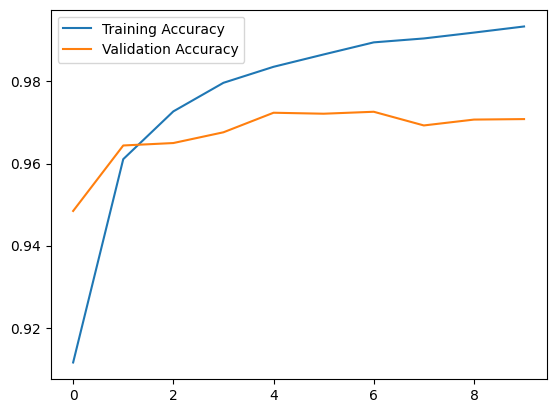

In [24]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### ***Make Predictions***

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


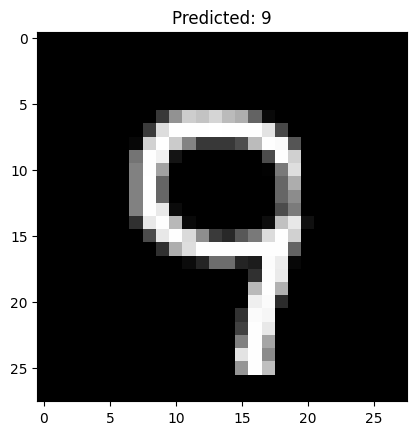

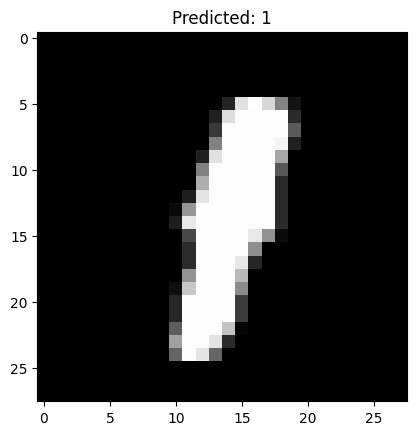

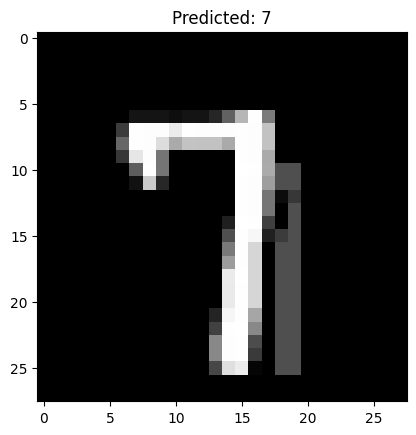

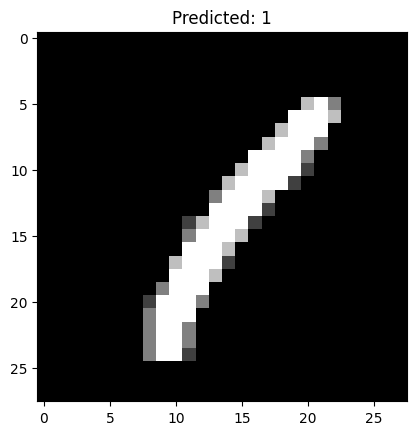

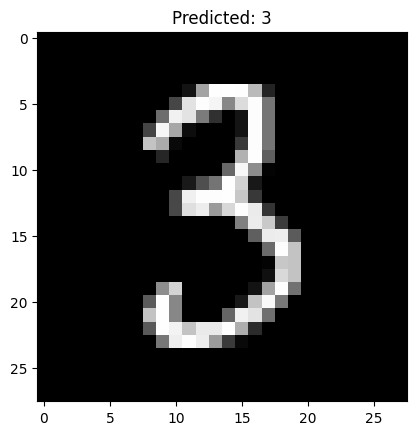

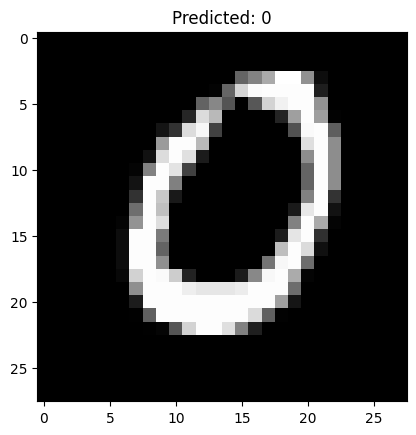

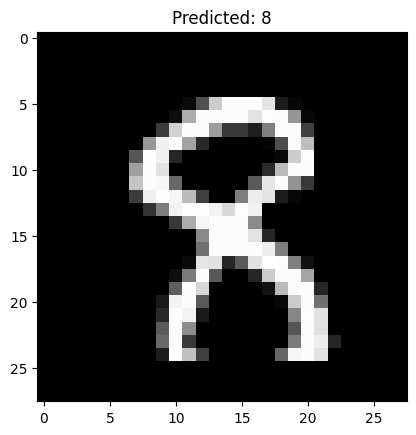

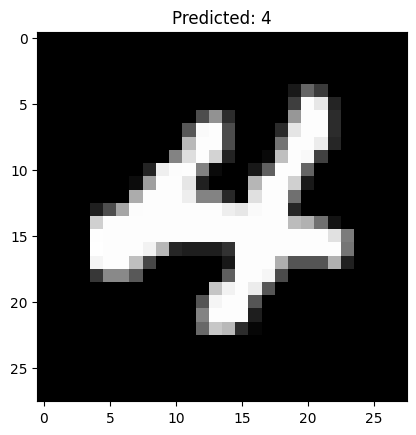

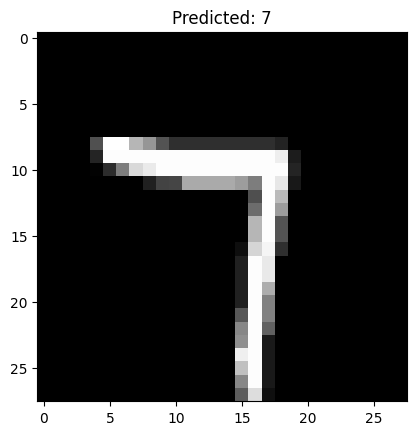

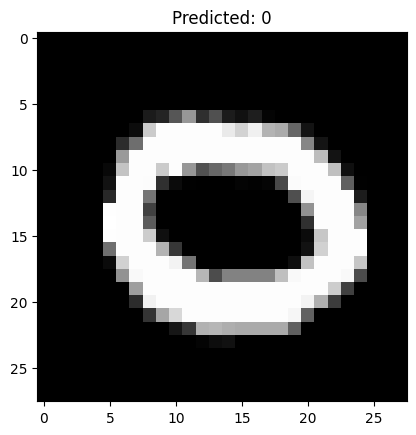

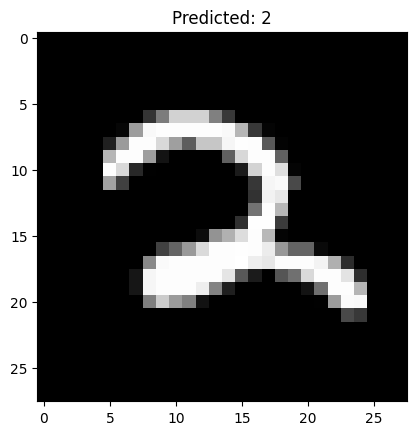

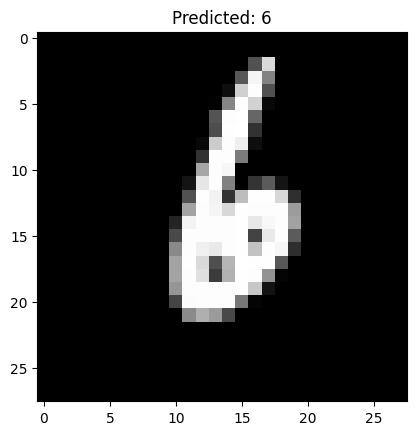

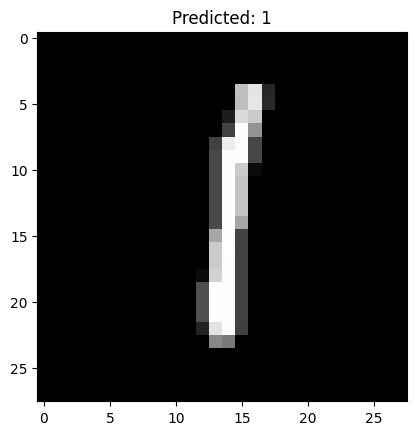

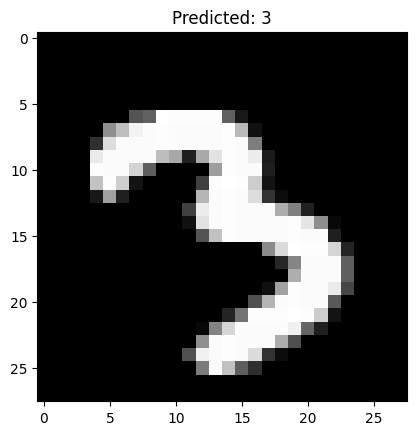

In [26]:
new_data = pd.read_csv('/content/test.csv')
X_test = new_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(14):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.show()